# Long-slit spectroscopy in the N-band of an AGN model (actual simulation using ScopeSim)

In the notebook `LSS_AGN-01_preparation` we prepared a simulated data cube of an AGN for "observation" with Scopesim/METIS. If you do not have the files `AGN_sim_prepared.fits` and `AGN_sim_rotated_50.fits`, please run the first notebook before proceeding.

In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [2]:
import scopesim as sim
sim.bug_report()

# Edit this path if you have a custom install directory, otherwise comment it out. [For ReadTheDocs only]
sim.rc.__config__["!SIM.file.local_packages_path"] = "../../../"

Python:
3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]

Installed Python packages:
           anisocado: 0.3.0
         astar-utils: 0.2.3a0
             astropy: 5.3.4
      beautifulsoup4: 4.12.2
            docutils: 0.19
               httpx: 0.23.3
                lxml: 4.9.4
          matplotlib: 3.8.0
      more-itertools: 10.1.0
               numpy: 1.26.3
               pooch: 1.7.0
              pyyaml: 6.0.1
               scipy: 1.11.4
            scopesim: 0.8.2
       scopesim_data: could not be loaded.
  scopesim_templates: 0.5.1
         skycalc_ipy: 0.4.0
             synphot: 1.2.1
                tqdm: 4.66.1

Installed IRDB packages:
  Armazones: 2023-07-11
        ELT: 2024-02-29
      METIS: 2024-02-29

Operating System info:
   System: Windows
  Release: 10
  Version: 10.0.22631
  Machine: AMD64


If you haven't got the instrument packages yet, uncomment the following cell.

In [3]:
# sim.download_package(["instruments/METIS", "telescopes/ELT", "locations/Armazones"])

In [4]:
cmd = sim.UserCommands(use_instrument="METIS", set_modes=['lss_n'],
                      properties={"!OBS.exptime": 3600, "!OBS.dit": None, "!OBS.ndit": None,
                                 "!SIM.spectral.spectral_bin_width": 3.0e-3})
metis = sim.OpticalTrain(cmd)

astar.scopesim.commands.user_commands - WARNING: Offline. Cannot check for updates for METIS.


Create two `Source` objects from the files. The first one is with the original field orientation, the second one has the field rotated by 50 degrees. We also define a `Source` that represents blank sky for background subtraction.

In [5]:
cube_01 = "AGN_sim_prepared.fits"
cube_02 = "AGN_sim_rotated_50.fits"

src_01 = sim.Source(cube=cube_01)
src_02 = sim.Source(cube=cube_02)

sky = sim.source.source_templates.empty_sky()

We observe each of the two sources and the blank sky; this takes a few minutes.

In [6]:
metis.observe(src_01, update=True)
hdul_01 = metis.readout(detector_readout_mode="auto")[0]

 FOVs:   0%|                                                                                     | 0/1 [00:00<?, ?it/s]

astar.scopesim.optics.image_plane_utils - WARNING: Non-linear WCS rescaled using linear procedure.



 FOV effects:  50%|███████████████████████████████████                                   | 1/2 [00:08<00:08,  8.96s/it]

astar.scopesim.effects.spectral_trace_list_utils - Mapping METIS LSS N



 FOVs: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.45s/it]
 Image Plane effects: 0it [00:00, ?it/s]

astar.scopesim.effects.electronic - Detector mode set to low_capacity
astar.scopesim.effects.electronic - Requested exposure time: 3600.000 s
astar.scopesim.effects.electronic - Required DIT without saturation: 0.036 s
astar.scopesim.effects.electronic - Exposure parameters: DIT = 0.036 s, NDIT = 100350
astar.scopesim.effects.electronic - Total exposure time: 3600.000 s
astar.scopesim.detector.detector_array - Extracting from 1 detectors...


astar.scopesim.effects.electronic - Detector mode set to low_capacity


In [7]:
metis.observe(src_02, update=True)
hdul_02 = metis.readout(detector_readout_mode="auto")[0]

 FOVs:   0%|                                                                                     | 0/1 [00:00<?, ?it/s]

astar.scopesim.optics.image_plane_utils - WARNING: Non-linear WCS rescaled using linear procedure.



 FOV effects:  50%|███████████████████████████████████                                   | 1/2 [00:01<00:01,  1.86s/it]

astar.scopesim.effects.spectral_trace_list_utils - Mapping METIS LSS N



 FOVs: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.41s/it]
 Image Plane effects: 0it [00:00, ?it/s]

astar.scopesim.effects.electronic - Detector mode set to low_capacity
astar.scopesim.detector.detector_array - Extracting from 1 detectors...


astar.scopesim.effects.electronic - Detector mode set to low_capacity


In [8]:
metis.observe(sky, update=True)
hdul_sky = metis.readout(detector_readout_mode="auto")[0]

 FOV effects:  50%|███████████████████████████████████                                   | 1/2 [00:01<00:01,  1.64s/it]

astar.scopesim.effects.spectral_trace_list_utils - Mapping METIS LSS N



 FOVs: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.00s/it]
 Image Plane effects: 0it [00:00, ?it/s]

astar.scopesim.effects.electronic - Detector mode set to low_capacity
astar.scopesim.detector.detector_array - Extracting from 1 detectors...


astar.scopesim.effects.electronic - Detector mode set to low_capacity


The difference between the background-subtracted 2D-spectra of the two sources is significant. Compare to the images in the first notebook, `LSS_AGN-01_preparation.ipynb`.

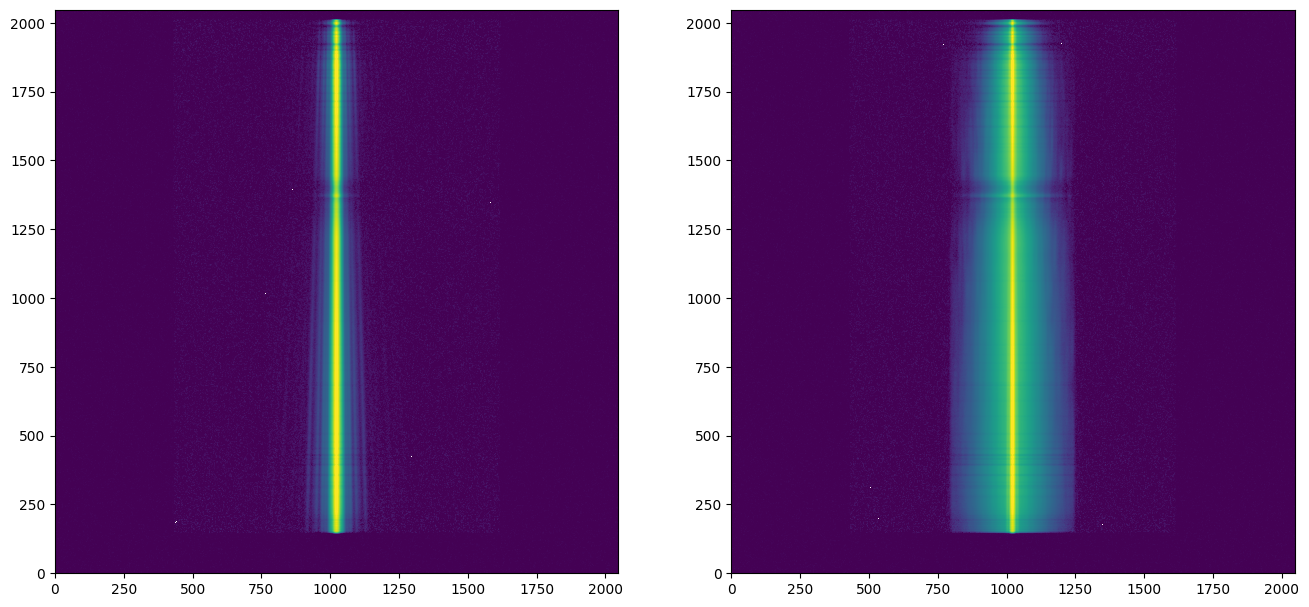

In [9]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.imshow(hdul_01[1].data - hdul_sky[1].data + 1e5, origin='lower', norm=LogNorm(vmin=1e5, vmax=5e8))
plt.subplot(122)
plt.imshow(hdul_02[1].data - hdul_sky[1].data + 1e5, origin='lower', norm=LogNorm(vmin=1e5, vmax=5e8))

Save the simulation results in FITS files for analysis with external tools.

In [10]:
hdul_01.writeto("AGN_prepared-scopesim_lss_n.fits", overwrite=True)
hdul_02.writeto("AGN_rotated_50-scopesim_lss_n.fits", overwrite=True)
hdul_sky.writeto("AGN_background-scopesim_lss_n.fits", overwrite=True)